In [2]:
cd /content/drive/MyDrive/멀티캠퍼스/Project 2

/content/drive/MyDrive/멀티캠퍼스/Project 2


In [3]:
import numpy as np

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

 0(IT과학), 1(경제), 2(사회), 3(생활문화), 4(세계), 5(스포츠), 6(정치)

In [4]:
train = pd.read_csv('train_preprocessing.csv')
train.head()

,index,title,topic_idx,data,new_title
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4,인천→핀란드 항공기 결항…휴가철 여행객 분통,인천 핀란드 항공기 결항 휴가 철 여행객 분통
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4,실리콘밸리 넘어서겠다…구글 15조원 들여 미국 전역 거점화,실리콘밸리 넘어서다 구글 조원 들이다 미국 전역 거점
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,이란 외무 긴장 완화 해결 책 미국 경제 전쟁 멈추다
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4,NYT 클린턴 측근 한국 기업 특수관계 조명…공과 사 맞물려종합,NYT 클린턴 측근 한국 기업 특수 관계 조명 공과 맞다 물리다
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,시진핑 트럼프 중미 무역 협상 조속 타결 희망


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


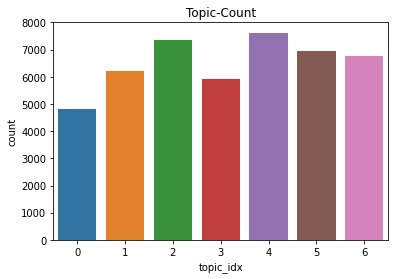

In [ ]:
sns.countplot(x="topic_idx", data=train)
plt.title('Topic-Count')
plt.ylim(0, 8000)
plt.show()

## 상위 빈출 단어 분석


## 단어 중요도(TF-IDF) 분석

- TF(Term Frequency), IDF(Inverse Document Frequency)
- TF-IDF : 특정 단어에 대한 중요도를 추출, TF와 IDF를 곱한 값. 즉 TF가 높고, DF가 낮을수록 값이 커지는 것을 이용하는 것, TF-IDF는 여러문서에 골고루 나오면 값이 낮고, 몇개 문서에만 집중적으로 나오면 값이 높게 나옴.



In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = []
for i in range(100):
  corpus.append(train['new_title'][i])

tfidfv = TfidfVectorizer(analyzer='word', min_df = 2).fit(corpus)
# analyzer = 'word'라고 설정시, 학습의 단위를 단어로 설정합니다. (ex - home, go, my ...) 
# analyzer = 'char'라고 설정시, 학습의 단위를 글자로 설정합니다.(ex - a, b, c, d ...)
# min-df : DF(document-frequency)의 최소 빈도값을 설정해주는 파라미터
tfidfv

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=2, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [20]:
tfidfv.transform(corpus)  # 4행9열의 메트릭스 자료이며 numpy 자료임을 표시함.

<100x89 sparse matrix of type '<class 'numpy.float64'>'
	with 245 stored elements in Compressed Sparse Row format>

In [21]:
print(tfidfv.transform(corpus))

  (1, 26)	1.0
  (2, 56)	0.4085147935514003
  (2, 50)	0.5218404836432068
  (2, 26)	0.3284280890297452
  (2, 16)	0.4628193378605919
  (2, 8)	0.4886014980730554
  (3, 79)	0.42945530530363696
  (3, 75)	0.45867064490515047
  (3, 25)	0.42945530530363696
  (3, 15)	0.45867064490515047
  (3, 11)	0.45867064490515047
  (4, 85)	0.7974065707303929
  (4, 78)	0.6034424255519285
  (5, 68)	0.7299725565232921
  (5, 37)	0.6834764565973351
  (6, 77)	1.0
  (7, 78)	0.46179799201111976
  (7, 75)	0.6102334499318027
  (7, 26)	0.3840595203038339
  (7, 10)	0.5165811030446398
  (8, 80)	0.5520422571841999
  (8, 51)	0.5895970430230183
  (8, 17)	0.5895970430230183
  (9, 78)	0.48353840728836844
  (9, 41)	0.6389618741499533
  :	:
  (89, 21)	0.5089180104670066
  (89, 8)	0.608688121545962
  (90, 77)	0.376809626726815
  (90, 76)	0.42486236370651964
  (90, 64)	0.3978004656376896
  (90, 24)	0.42486236370651964
  (90, 23)	0.3978004656376896
  (90, 0)	0.42486236370651964
  (91, 79)	0.6834764565973351
  (91, 15)	0.72997255652

In [22]:
## 변수 확인
features=tfidfv.get_feature_names()
features[:5]

['is', 'nba', 'uae', '가능성', '갈등']

In [23]:
# 데이터프레임으로도 변환
tmp = tfidfv.transform(corpus).toarray()
df_tfidf = pd.DataFrame(tmp,columns=features)

In [66]:
sum_tfidf = df_tfidf.sum(axis=0)
final_tfidf = pd.DataFrame({'tfidf':sum_tfidf}).reset_index().sort_values(by='tfidf', ascending=False)
final_tfidf

,index,tfidf
26,미국,6.962212
78,트럼프,3.799000
86,홍콩,3.382021
21,대통령,3.375507
56,이란,3.290462
...,...,...
67,촉구,0.879659
84,협력,0.829526
18,난사,0.740211
73,최악,0.720620


### TF-IDF 함수화
- 전체 데이터를 계산하지 않고, topic 별로 나누어 계산함

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_count(topic_data):

  corpus = []
  for i in range(len(topic_data)):
    corpus.append(topic_data['new_title'][i])

  tfidfv = TfidfVectorizer(analyzer='word', min_df = 2).fit(corpus)
  features=tfidfv.get_feature_names()

  tmp = tfidfv.transform(corpus).toarray()
  df_tfidf = pd.DataFrame(tmp,columns=features)

  sum_tfidf = df_tfidf.sum(axis=0)
  final_tfidf = pd.DataFrame({'tfidf':sum_tfidf}).reset_index().sort_values(by='tfidf', ascending=False)
  return(final_tfidf)

In [79]:
## topic index별로 데이터 분류하는 함수 생성
def topic(topic_number):
  topic_data = []
  for i in range(len(train)):
    if train['topic_idx'][i]==topic_number:
        topic_data.append(train.iloc[i])

  topic_data = pd.DataFrame(topic_data).reset_index().drop(['level_0','index'], axis=1)
  return(topic_data)

In [83]:
## topic_idx 별로 데이터 분리
topic0 = topic(0)
topic1 = topic(1)
topic2 = topic(2)
topic3 = topic(3)
topic4 = topic(4)
topic5 = topic(5)
topic6 = topic(6)

In [ ]:
0(IT과학), 1(경제), 2(사회), 3(생활문화), 4(세계), 5(스포츠), 6(정치)

In [112]:
print('IT과학')
display(tfidf_count(topic0).head(10))
print('경제')
display(tfidf_count(topic1).head(10))
print('사회')
display(tfidf_count(topic2).head(10))
print('생활문화')
display(tfidf_count(topic3).head(10))
print('세계')
display(tfidf_count(topic4).head(10))
print('스포츠')
display(tfidf_count(topic5).head(10))
print('정치')
display(tfidf_count(topic6).head(10))

IT과학


,index,tfidf
2742,출시,113.819663
76,lg,95.323796
217,개발,90.227793
1401,삼성,84.913055
70,kt,83.668990
1,ai,78.084651
237,갤럭시,77.867905
510,기술,76.528033
1454,서비스,58.381142
592,네이버,56.860711


경제


,index,tfidf
1342,분기,133.414200
2072,영업,126.315391
1958,억원,119.308818
3174,투자,108.154722
2763,증권,98.777901
3066,코스피,97.883133
2467,작년,89.159440
1472,삼성,82.036242
493,금융,80.699956
3188,특징,68.142773


사회


,index,tfidf
4689,코로나,88.691359
5068,한국,67.983880
4272,지원,58.042997
2235,사장,49.077559
822,기자,47.133743
602,교육,45.189222
1850,방송,44.873106
1035,노조,44.727116
5038,학교,44.722504
2042,부산,44.354752


생활문화


,index,tfidf
2184,신간,194.131171
3500,축제,82.935287
2451,여행,72.675523
638,날씨,67.064743
3889,한국,64.390214
1899,서울,59.781768
3203,주말,56.325140
3059,전국,55.173214
327,공연,54.045467
3209,주의보,47.212856


세계


,index,tfidf
1629,미국,232.492569
4008,중국,165.617550
3448,이란,153.833472
4655,트럼프,130.274340
3563,일본,97.228951
4589,터키,88.531688
2176,사망,81.686633
2655,시위,72.445964
2640,시리아,72.281769
1081,대통령,69.020313


스포츠


,index,tfidf
136,감독,145.697344
247,경기,123.720187
2014,시즌,96.736315
1020,류현진,95.199623
2478,월드컵,93.183139
2302,연승,90.200360
1023,리그,79.933322
3303,축구,78.743796
3698,프로농구,77.335030
1763,선수,75.510241


정치


,index,tfidf
1080,대통령,229.532445
1829,북한,208.999954
1528,박근혜,134.088055
3795,청와대,93.559928
738,김정은,85.867128
4233,한국,81.176892
1501,민주,75.963755
542,국회,70.698208
4133,평양,69.589201
3362,정상회담,66.532809
